In [1]:
import sys
import os

# Add particle_detection to sys.path
sys.path.append(os.path.abspath(".."))

In [2]:
from particle_detection.data.data_pipeline import create_dataloaders
import matplotlib.pyplot as plt

In [4]:
data_dir = "../data"
image_size = (2048, 2048)
batch_size = 8

train_loader, test_loader = create_dataloaders(data_dir=data_dir, image_size=image_size, batch_size=batch_size)

# Test the loaders
for images in train_loader:
    print(images.shape) 

torch.Size([8, 1, 2048, 2048])


Training Images:


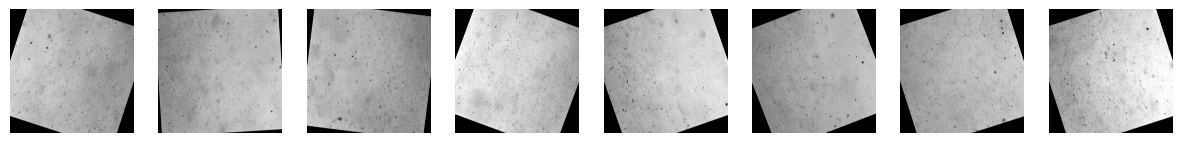

Testing Images:


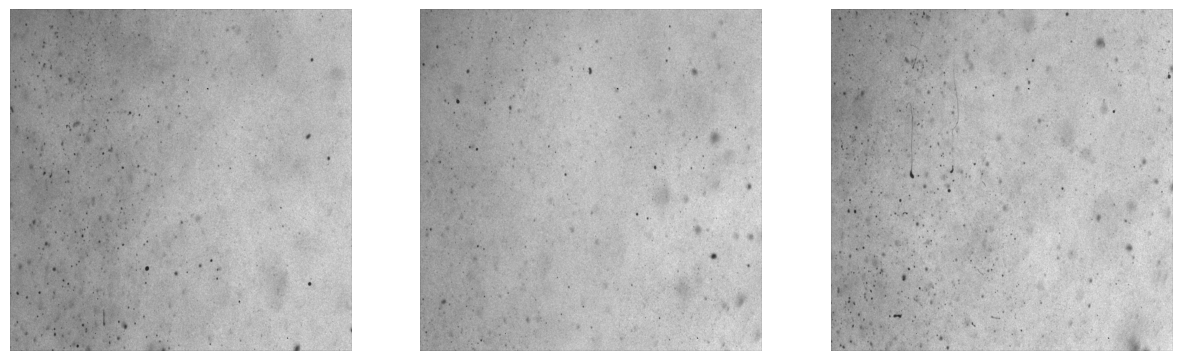

In [5]:
def display_images_from_loader(loader, num_images=8):
    """
    Displays a batch of images from a PyTorch DataLoader.

    Args:
        loader (torch.utils.data.DataLoader): A DataLoader instance created using
            the `create_dataloaders` function from `particle_detection.data.dataset`.
        num_images (int, optional): Number of images to display. Defaults to 8.

    Returns:
        None
    """
    images = next(iter(loader))
    images = images[:num_images]

    images = images.permute(0, 2, 3, 1).numpy()

    #if grayscale adjust
    if images.shape[-1] == 1:
        images = images.squeeze(-1)
    
    # Plot the images
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    for i, img in enumerate(images):
        ax = axes[i]
        ax.imshow(img, cmap="gray" if len(img.shape) == 2 else None)
        ax.axis("off")
    plt.show()

# Example usage for train and test loaders
print("Training Images:")
display_images_from_loader(train_loader, num_images=8)

print("Testing Images:")
display_images_from_loader(test_loader, num_images=8)

In [ ]:
#how to save test dataset as .png files

In [7]:
import torch
from torchvision.utils import save_image

save_dir = "../test_dataset/"
os.makedirs(save_dir, exist_ok=True)

images = next(iter(test_loader))

for img_idx, img in enumerate(images):
    filename = f"test_{img_idx}.png"
    filepath = os.path.join(save_dir, filename)
    save_image(img, filepath)